---------------------------------------------
---------------------------------------------
#       Basic Neural Network Model 
##       Hand Scripted from First Principles
---------------------------------------------
---------------------------------------------
- Author      : Praveen KCh
- Email       : praveench1888@gmail.com 
- Last Edited : 10-01-2026
---------------------------------------------

### Key Notes: 
1. Scripting Language : Python
2. Libraries used : Numpy, Pandas, Matplotlib
3. Option to choose following :
    1. No of Input / Outputs
    2. No of Layers 
    3. No of Neorons 
4. Feed Forward Neural Network Architecture
5. Activation Function : Sigmoid 
6. Loss Function : Mean Squared Error (MSE) 
7. Example Data Generated from Vertical Wave Bending Moment Formula given in Common Structural Rules for Bulk Carriers and Oil Tankers
   [Ref 3.1, Section 4, Chapter 4, Part 1, CSR for Bulk Carriers and Oil Tankers]


## Libraries
1. Numpy for Array Creation and Array operations
2. Pandas to Read & Process Data from Input file
3. Matplotlib is used to generate charts / plots


In [65]:
# Import Modules / Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Network Architecture

        Layer No                :       0               1               ...     i               ...     nL
        Layer Type              :       Input           Hidden          ...     Hidden          ...     Output
        No of Neurons           :       nN[0]           nN[1]           ...     nN[i]           ...     nN[nL]
        

        Weights  (list)         :       W[0]            W[1]            ...     W[i]            ...     W[nL]         
           Elm 2D Arrays  Size  :       (0,0)           (nN[1],nN[0])   ...     (nN[i],nN[i-1]) ...     (nN[nL],nN[nL-1])


        Bias     (list)         :       b[0]            b[0]            ...     b[i]            ...     b[nL] 
           Elms 1D arrs size    :       0               nN[1]           ...     nN[i]           ...     nN[nL]

        z = W*a+b (list)        :       z[0]            z[1]            ...     z[i]            ...     z[nL]
           Elms 1D arrs size    :       0               nN[1]           ...     nN[i]           ...     nN[nL]

        a = sigmoid(z) (list)   :       a[0]            a[1]            ...     a[i]            ...     a[nL]
           Elms 1D arrs size    :       0               nN[1]           ...     nN[i]           ...     nN[nL]

Note:
+ The Neurons in last Layer dont have an Post Activation Function
***

 ### The following data has to be set by user
 - nI = Number of Input Variables
 - nO = Number of Output Variables
 - nL = Number of "Weighted Layers"
 - nN = An array of size "nL+1", to hold the number of neurons in each array 

        Element                     Data                   Default Value
        -------         ----------------------------       -------------
        nN[0]   -->     0th Input Layer non weighted    =   nI 
        nN[1]   -->     1st Weighted layer              =   nI 
        nN[2]   -->     2nd Weighted layer              =   nI
        .
        .
        .
        nN[nL]  -->     nLth Output layers "Weighted"   =   nO

    Note: 
    + The Input layer is not weighted, therefore it is not counted 
    + The output layer is weighted, therfore it is counted
    + Total Number of "Weighted Layers" = nL + 1 

### The following variables are initialized to store the Network Parameters
- W --> List of 2D arrays, each array stores Weights of a layer
- b --> List of 1D arrays, each array stores Biases of a layer

- z --> List of 1D arrays to store Weighted Sums + bias of each layer
- a --> List of 1D arrays to store Activated outputs of each layer

    Note:
    + Zeroth element of W, b and z lists is empty because input layer is not weighted
    + Zeroth element of a list contains the inputs


In [66]:
''' -----------------------------------------------------------------
User may Edit this Section to change Network Architecture
----------------------------------------------------------------- '''

# Basics
nI = 3
nO = 2
nL = 3

# Number of Neurons in Each layer
nN = np.ones(nL+1,dtype=int)
nN[0] = nI
nN[1:-1] *= nI
nN[-1] = nO

# List of Weights
W = [np.ones((nN[i],nN[i-1])) for i in range(0,nL+1)]
W[0] = []

# List of Biases
b = [np.ones(nN[i]) for i in range(0,nL+1)]
b[0] = []

# List to store Weighted sum + bias for each neuron
z= [np.zeros(nN[i]) for i in range(0,nL+1)]
z[0] = []

# List to store Output from each neuron (post activation)
a = [np.zeros(nN[i]) for i in range(0,nL+1)]

# Printing the Architecture
print("\nNeural Network Architecture")
print("---------------------------")
print("Input Neurons  :",nI)
print("Output Neurons :",nO)
print("Total Layers   :",nL+1)
print("Weights Layers :",nL)
print("Hidden Layers  :",nL-1)
print()
print("Detailed Layer Information")
print("--------------------------")
print("Layer 0 :",nN[0],"Neurons"," W",W[0]," b",b[0],"Input Layer")
for i in range(1,nL):
    print("Layer",i,":",nN[i],"Neurons"," W",W[i].shape," b",b[i].shape," Hidden Layer")
print("Layer",nL,":",nN[nL],"Neurons"," W",W[nL].shape," b",b[nL].shape," Output Layer")
print()


Neural Network Architecture
---------------------------
Input Neurons  : 3
Output Neurons : 2
Total Layers   : 4
Weights Layers : 3
Hidden Layers  : 2

Detailed Layer Information
--------------------------
Layer 0 : 3 Neurons  W []  b [] Input Layer
Layer 1 : 3 Neurons  W (3, 3)  b (3,)  Hidden Layer
Layer 2 : 3 Neurons  W (3, 3)  b (3,)  Hidden Layer
Layer 3 : 2 Neurons  W (2, 3)  b (2,)  Output Layer



## Activation Functions
$ \sigma(x) = 1/(1+exp(-x))$

$ d\sigma(x)/dx = \sigma(x).(1-\sigma(x)) $


### Functions
- af_sigmoid  
    - Augment   :   z
    - Returns   :   $\sigma(z)$
- daf_sigmoid   
    - Augment   :   z       
    - Returns   :   $d\sigma(x)/dx$
- daf_sigmoid2  
    - Augment   :   a
    - Returns   :   $a*(1-a)$



Text(0, 0.5, 'a or da/dz')

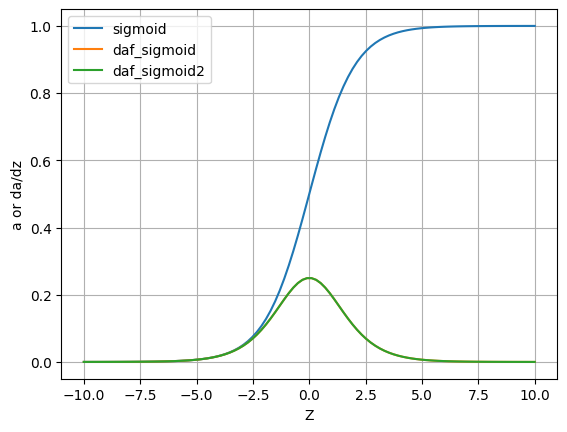

In [67]:
# Defining Activation Functions

# Activation Function : Sigmoid
def af_sigmoid(z):
    val = 1/(1+np.exp(-z))
    return val

# Derivative of Activation Function : Sigmoid when given 'z'
def daf_sigmoid(z):
    val0 = af_sigmoid(z)
    val = val0*(1-val0)
    return val

# Derivative of Activation Function : Sigmoid when given 'a=sigma(z)' 
def daf_sigmoid2(a):
    val = a * (1 - a)
    return val

# Testing 
z_samp=np.linspace(-10,10,100,endpoint=True)
a_samp=af_sigmoid(z_samp)
dadz_samp=daf_sigmoid(z_samp)
dadz2_samp=daf_sigmoid2(a_samp)

# Printing Data for Debugging
#for i in range(len(z_samp)):
#    print(f"Z = {z_samp[i]:5.2f} \t af_sigmoid = {a_samp[i]:5.2f} \t daf_sigmoid = {dadz_samp[i]:5.2f} \t daf_sigmoid2 = {dadz2_samp[i]:5.2f}")

plt.plot(z_samp,a_samp,label='sigmoid')
plt.plot(z_samp,dadz_samp,label='daf_sigmoid')
plt.plot(z_samp,dadz2_samp,label='daf_sigmoid2')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Z')
plt.ylabel('a or da/dz')

## Data for Training & Testing NN Model

The data is read from an Sheet Named CSR_VBM in Excel File named "Data1.xlsx".

Data Generated from Vertical Wave Bending Moment Formula given in Common Structural Rules for Bulk Carriers and Oil Tankers
  [Ref 3.1, Section 4, Chapter 4, Part 1, CSR for Bulk Carriers and Oil Tankers]

The data consists of 5 columns as follows

1. L    --> Length of the Ship as defined in CSR rules
2. B    --> Breadth of the Ship as defined in CSR rules
3. Cb   --> Bloc Coeffcint of the ship as defined in CSR rules
4. Mv-h --> Vertical Wave Bending Moment at Midship during Hog
5. Mv-s --> Vertical Wave Bending Moment at Midship during Sag 

The first three columns i.e., L, B, Cb are the input variables
The Last two columns i.e., Mv-h and Mv-s are the outputs to be predicted

Once trained with this data the Neural Network shall predict Mv-h and Mv-s when given L, B and Cb.

The Excel data is read using pandas in to a dataframe.
The Each column is Normalized as following:

$ x = \frac{(x-\mu_x)}{\sigma_x} $

where,
$ \mu_x$  is the mean of the column,

$ \sigma_x$ is the Standard Deviation of the column

2/3rd of the data is used for training : trn_data
1/3rd of the data is used for testing  : tst_data




-------------------------------------------------------------------------
Data Characteristics (All Data)
Data Frame Shape : (504, 5)
-------------------------------------------------------------------------
                              	    Min     	    Max     	    Mean    	  Std Dev   
Column     0 : L         	       90.00	      390.00	      240.00	       90.92
Column     1 : B         	       12.00	       78.00	       39.14	       15.94
Column     2 : CB        	        0.60	        0.90	        0.75	        0.11
Column     3 : Mv-h      	    85397.63	 21529264.69	  4840756.46	  4690944.51
Column     4 : Mv-s      	-22199064.03	  -107316.36	 -5428101.58	  5172824.78


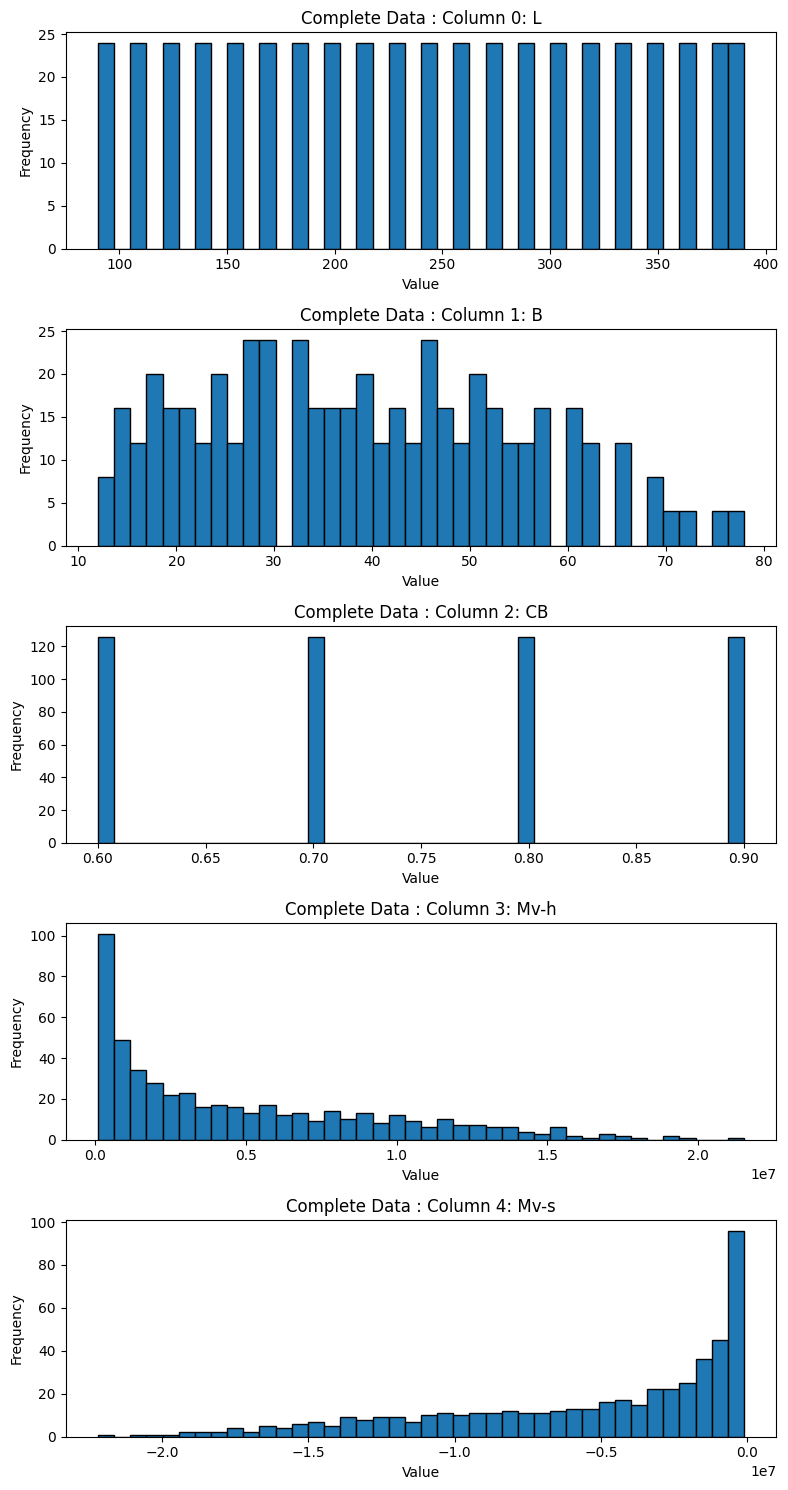

*************************************************************************
-------------------------------------------------------------------------
Data Characteristics (Training Data)
Data Frame Shape : (336, 5)
-------------------------------------------------------------------------
                              	    Min     	    Max     	    Mean    	  Std Dev   
Column     0 : L         	       -1.65	        1.65	        0.00	        1.00
Column     1 : B         	       -1.65	        2.44	        0.10	        1.03
Column     2 : CB        	       -1.34	        1.34	        0.00	        1.00
Column     3 : Mv-h      	       -1.01	        3.56	        0.04	        1.04
Column     4 : Mv-s      	       -3.25	        1.03	       -0.04	        1.04


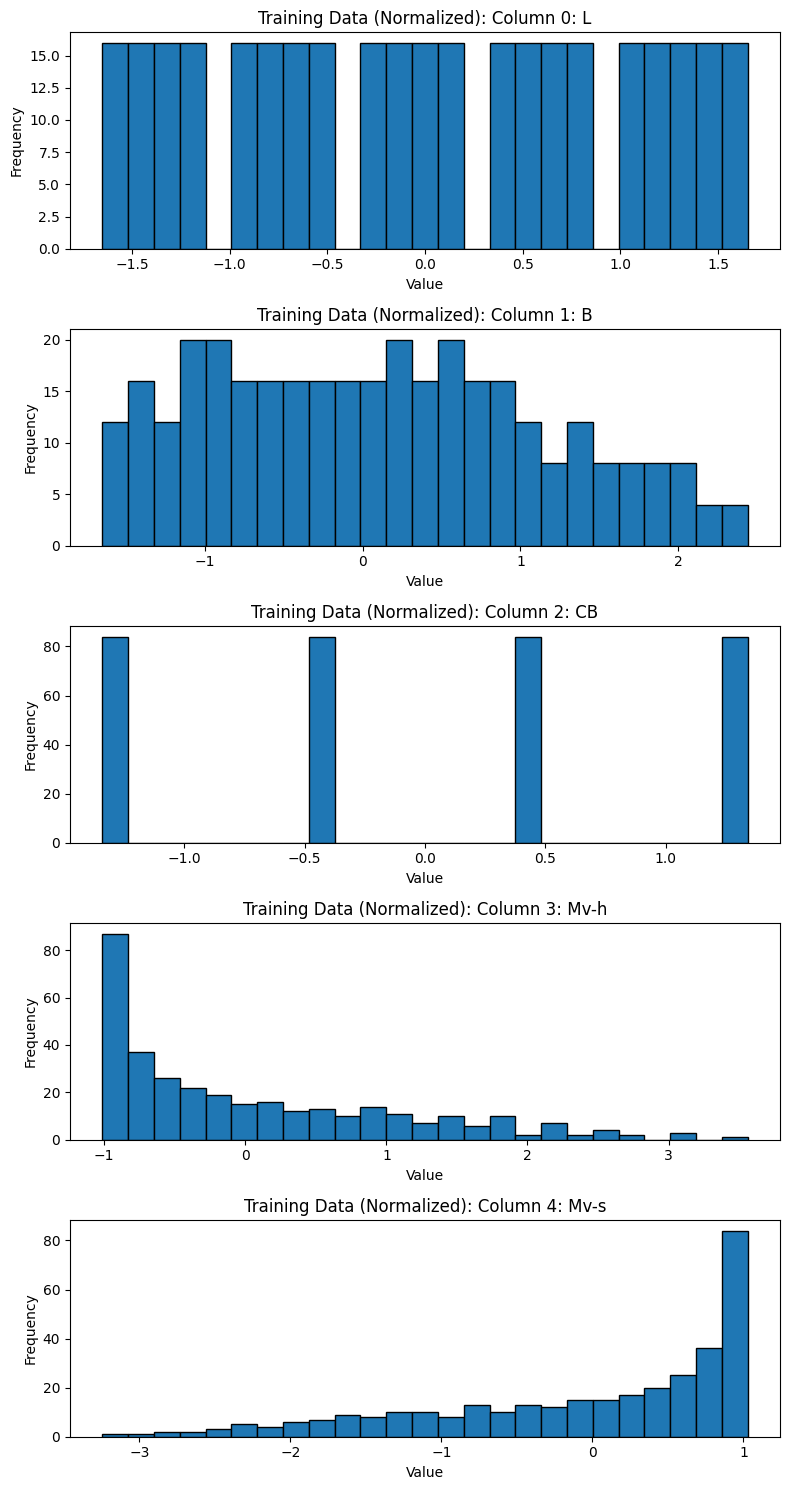

*************************************************************************
-------------------------------------------------------------------------
Data Characteristics (Testing Data)
Data Frame Shape : (168, 5)
-------------------------------------------------------------------------
                              	    Min     	    Max     	    Mean    	  Std Dev   
Column     0 : L         	       -1.65	        1.65	        0.00	        1.00
Column     1 : B         	       -1.70	        1.62	       -0.20	        0.90
Column     2 : CB        	       -1.34	        1.34	        0.00	        1.00
Column     3 : Mv-h      	       -1.01	        2.80	       -0.08	        0.91
Column     4 : Mv-s      	       -2.53	        1.03	        0.08	        0.91


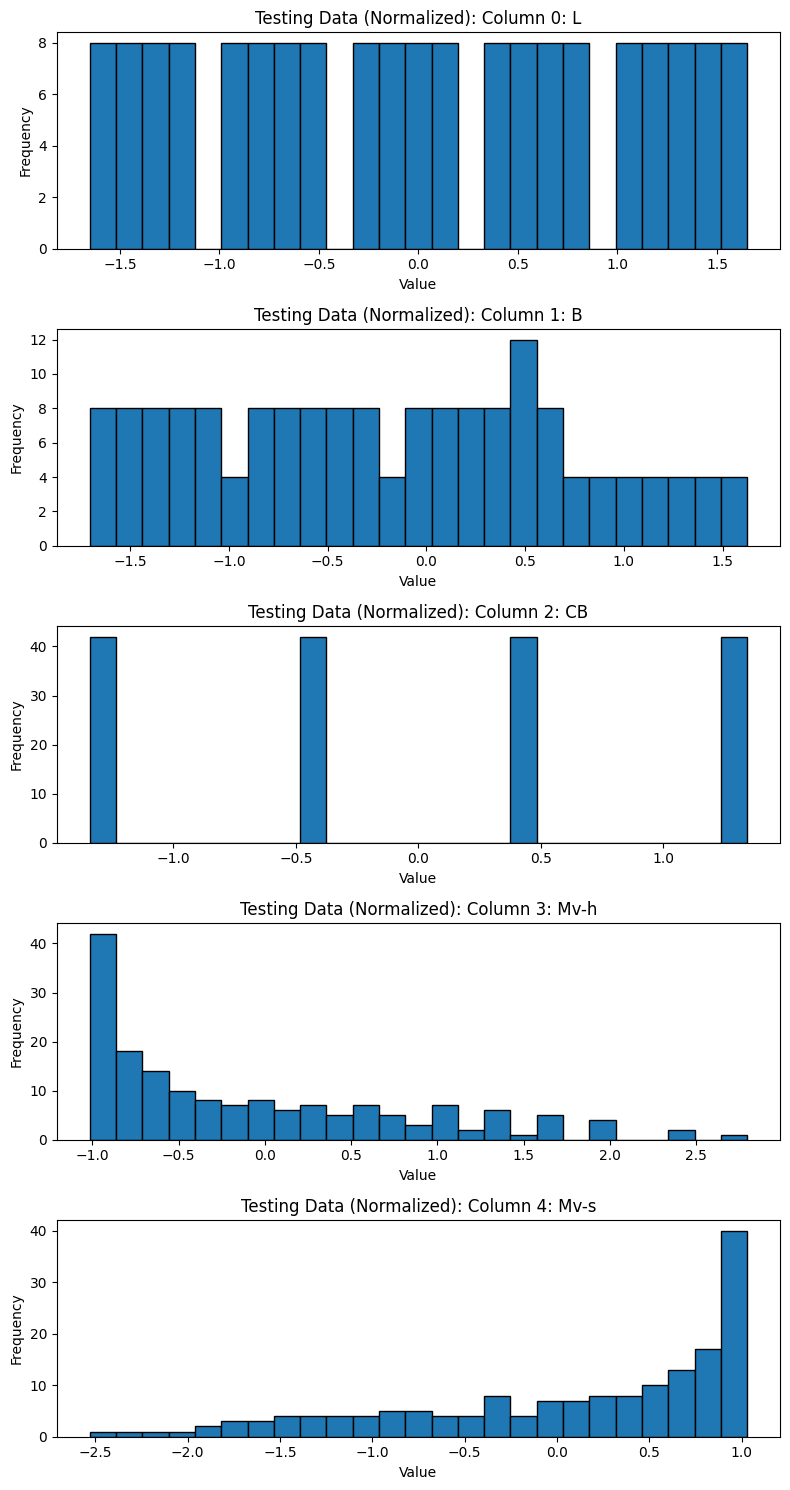

In [68]:
# Read Data from the Excel Sheet 
datafrm=pd.read_excel('Data1.xlsx','CSR_VBM',header=0,index_col=None,usecols='A:C,L:M',dtype=np.float64)

# Process Read Data
nr_data = len(datafrm)
nc_data = datafrm.shape[1]

# Numpy array 
datarr = np.array(datafrm[:nr_data:1])
c_mean = np.mean(datarr,axis=0) 
c_stdv = np.std(datarr,axis=0,ddof=0)
datarr_norm = (datarr-c_mean)/c_stdv

# Data for Training
mask = np.arange(nr_data) % 3 != 2
trn_data = np.array(datarr_norm[mask])
n_trn_data = len(trn_data)

# Data for Testing
mask = np.arange(nr_data) % 3 == 2
tst_data = np.array(datarr_norm[mask])

# Printing Data Characteristics 
## All data frame

print("-------------------------------------------------------------------------")
print("Data Characteristics (All Data)")
print("Data Frame Shape :",datafrm.shape)
print("-------------------------------------------------------------------------")
print(f"{'':30s}\t{'Min':^12s}\t{'Max':^12s}\t{'Mean':^12s}\t{'Std Dev':^12s}")
for i in range(nc_data):
    print(f"Column {i:5d} : {datafrm.columns[i]:<10s}",end="")
    print(f"\t{datafrm.iloc[:,i].min():12.2f}",end="")
    print(f"\t{datafrm.iloc[:,i].max():12.2f}",end="")
    print(f"\t{datafrm.iloc[:,i].mean():12.2f}",end="")
    print(f"\t{datafrm.iloc[:,i].std():12.2f}")
plt.figure(figsize=(8, nc_data*3))
for i in range(nc_data):
    plt.subplot(nc_data,1,i+1)
    plt.hist(datafrm.iloc[:,i],bins=40,edgecolor='black')
    plt.title(f'Complete Data : Column {i}: {datafrm.columns[i]}')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
plt.tight_layout()
plt.show()
print("*************************************************************************")
print("-------------------------------------------------------------------------")
print("Data Characteristics (Training Data)")
print("Data Frame Shape :",trn_data.shape)
print("-------------------------------------------------------------------------")
print(f"{'':30s}\t{'Min':^12s}\t{'Max':^12s}\t{'Mean':^12s}\t{'Std Dev':^12s}")
for i in range(nc_data):    
    print(f"Column {i:5d} : {datafrm.columns[i]:<10s}",end="")
    print(f"\t{trn_data[:,i].min():12.2f}",end="")
    print(f"\t{trn_data[:,i].max():12.2f}",end="")
    print(f"\t{trn_data[:,i].mean():12.2f}",end="")
    print(f"\t{trn_data[:,i].std():12.2f}")
plt.figure(figsize=(8, nc_data*3))
for i in range(nc_data):
    plt.subplot(nc_data,1,i+1)
    plt.hist(trn_data[:,i],bins=25,edgecolor='black')
    plt.title(f'Training Data (Normalized): Column {i}: {datafrm.columns[i]}')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
plt.tight_layout()
plt.show()
print("*************************************************************************")
print("-------------------------------------------------------------------------")
print("Data Characteristics (Testing Data)")
print("Data Frame Shape :",tst_data.shape)
print("-------------------------------------------------------------------------")
print(f"{'':30s}\t{'Min':^12s}\t{'Max':^12s}\t{'Mean':^12s}\t{'Std Dev':^12s}")
for i in range(nc_data):    
    print(f"Column {i:5d} : {datafrm.columns[i]:<10s}",end="")
    print(f"\t{tst_data[:,i].min():12.2f}",end="")
    print(f"\t{tst_data[:,i].max():12.2f}",end="")
    print(f"\t{tst_data[:,i].mean():12.2f}",end="")
    print(f"\t{tst_data[:,i].std():12.2f}")
plt.figure(figsize=(8, nc_data*3))
for i in range(nc_data):
    plt.subplot(nc_data,1,i+1)
    plt.hist(tst_data[:,i],bins=25,edgecolor='black')
    plt.title(f'Testing Data (Normalized): Column {i}: {datafrm.columns[i]}')
    plt.ylabel('Frequency')
    plt.xlabel('Value')
plt.tight_layout()
plt.show()

## Training 

- Training is done in epochs 
- Initially the Weights and Biases are all set to one
- The Weight and Biases are updated using Gradient Decendent Method.
- In every epoch whole training data is used to correct the Weights and Biases based on Mean Square Error Loss
- Each epoch is composed of following steps
    - **Forward Pass** : 
        - The inputs from the training data are used to predict the outputs using the existing weights and biases

        $ a^1_i= \sigma({\sum_j W_{i,j}^1 a^0_j})$

        $ a^2_i= \sigma({\sum_j W_{i,j}^2 a^1_j})$

        ...

        $ a^l_i= \sigma({\sum_j W_{i,j}^l a^{l-1}_j})$

        $ a^{nL}_i= ({\sum_j W_{i,j}^{nL} a^{nL-1}_j})$

    - **Loss Computation & Stopping Criteria check** : 
        - Mean Square Error Loss function is used for this computation.
        
        $ Loss = \frac{1}{N} \sum_{i=1}^n (y-y')^2$
        
        - if loss is less than or equal to a thershold (0.001) then loop of epochs is exited
        - if loss is greater than the thershold then next steps in the loop are executed

    - **Back Propogation** : 
        - The derivative of loss w.r.t weights and biases are computed.
        - Chain rule for derivatives is used.
        - First the deriatives w.r.t weights and biases of last layer are computed using the following expression

        $ \frac{\partial L}{\partial w^{nL}_{i,j}}= \frac{\partial z^{nL}_{i}}{\partial w^{nL}_{i,j}} . \frac{\partial a^{nL}_{i}}{\partial z^{nL}_{i}} . \frac{\partial L}{\partial a^{nL}_{i}}$

        $ \frac{\partial L}{\partial w^{nL}_{i,j}}= -2(y-a^{nL}_{i}) . 1 .  a^{nL-1}_{i} $

        put, 
        
        $ \delta^{nL}_{i} =-2(y-a^{nL}_{i}) $

        $ \frac{\partial L}{\partial w^{nL}_{i,j}}= \delta^{nL}_{i} . a^{nL-1}_{i} $

        Simillarly,

        $ \frac{\partial L}{\partial b^{nL}_{i}}= \delta^{nL}_{i} $

        - Then these are used to compute the derivatives of second last layer using the following expressions
        
        $ \frac{\partial L}{\partial w^{nL-1}_{i,j}}= \delta^{nL-1}_{i} . a^{nL-2}_{i}$

        $ \frac{\partial L}{\partial b^{nL-1}_{i}}= \delta^{nL-1}_{i}$

        $ \delta^{nL-1}_{i} = (\sum_{j=1}^{nN_{nL}} w^{nL}_{j,i}\delta^{nL}_{j}) . a^{nL-1}_{i} . (1-a^{nL-1}_{i})$

        - This process is repeated till first layers. At any layer 'l' the derivatives are computed using the following expressions

        $ \frac{\partial L}{\partial w^{l}_{i,j}}= \delta^{l}_{i} . a^{l-1}_{i}$

        $ \frac{\partial L}{\partial b^{l}_{i}}= \delta^{l}_{i}$

        $ \delta^{l}_{i} = (\sum_{j=1}^{nN_{l+1}} w^{l+1}_{j,i}\delta^{l+1}_{j}) . a^{l}_{i} . (1-a^{l}_{i})$

        Matrix operations in the below code block, perfrom the abov computations for the entire data set in each epoch. 

        The Mean gradients are obtained over the dataset and are used to update the W, & B in the next step.


    - **Update Weights and Biases**

        - The weights and  Biases are updated as follows:

        $ w^l_{i,j} = w^l_{i,j} - lr * \frac{\partial L}{\partial w^{l}_{i,j}} $

        $ b^l_{i} = b^l_{i} - lr * \frac{\partial L}{\partial b^{l}_{i}} $

        In each epoch entire training data is used and the derivatives $\frac{\partial L}{\partial w^{l}_{i,j}}$ and $\frac{\partial L}{\partial b^{l}_{i}} $ are averages of entire data.

        lr is learning rate              




In [69]:
# -----------------------------------------
# Training Loop
# -----------------------------------------
for epoch in range(0,100000):
    
    # Assign Input Data
    a[0] = trn_data[:,0:3].T

    # -----------------------------------------
    # Step 1: Forward Pass
    # -----------------------------------------
    #-- Hidden Layers
    for i in range(1,nL):
        z[i]= W[i]@a[i-1] + b[i][:,None]
        a[i]=af_sigmoid(z[i])
        pass
    #-- Layer nL i.e, Output Layer
    i=nL
    z[i]= W[i]@a[i-1] + b[i][:,None]
    a[i]=z[i]

    # -----------------------------------------
    # Step 2: Loss Calculation & Check Stopping Criteria
    # -----------------------------------------
    # Loss    
    loss = np.mean((trn_data[:, 3:5].T-a[-1])**2)

    # Stopping Criteria
    if loss < 0.005:
        print(f"Epoch {epoch:5d} : Loss = {loss:.6f} (Stopping Criteria Met)")
        break
    if epoch % 1000 == 0:
        print(f"Epoch {epoch:5d} : Loss = {loss:.6f}") 

    # -----------------------------------------
    # Step 3: Back Propogation
    # -----------------------------------------

    # Target Output
    y=trn_data[:,3:5].T

    # Weight Gradients Initialization
    dW = [np.ones((nN[i],nN[i-1])) for i in range(0,nL+1)]
    dW[0] = []

    # Bias Gradients Initialization
    db = [np.ones(nN[i]) for i in range(0,nL+1)]
    db[0] = []

    # Layer nL i.e, Output Layer
    delta = -2*(y - a[-1])
    dW[-1] = (delta @ a[-2].T) / n_trn_data
    db[-1] = np.mean(delta, axis=1)       

    # Hidden Layers
    for i in range(nL-1,0,-1):
        delta = (W[i+1].T @ delta) * daf_sigmoid2(a[i])
        dW[i] = (delta @ a[i-1].T) / n_trn_data
        db[i] = np.mean(delta, axis=1)
        pass

    # -----------------------------------------
    # Step 4: Update Weights and Biases
    # -----------------------------------------
    # Learning Rate
    lr = 0.01
    # Update Weights and Biases
    for i in range(nL,0,-1):
        W[i] = W[i] - lr * dW[i]
        b[i] = b[i] - lr * db[i]
        pass


Epoch     0 : Loss = 15.382598
Epoch  1000 : Loss = 0.917959
Epoch  2000 : Loss = 0.371786
Epoch  3000 : Loss = 0.174254
Epoch  4000 : Loss = 0.077282
Epoch  5000 : Loss = 0.035484
Epoch  6000 : Loss = 0.022050
Epoch  7000 : Loss = 0.016709
Epoch  8000 : Loss = 0.013886
Epoch  9000 : Loss = 0.012091
Epoch 10000 : Loss = 0.010828
Epoch 11000 : Loss = 0.009890
Epoch 12000 : Loss = 0.009170
Epoch 13000 : Loss = 0.008602
Epoch 14000 : Loss = 0.008145
Epoch 15000 : Loss = 0.007770
Epoch 16000 : Loss = 0.007459
Epoch 17000 : Loss = 0.007195
Epoch 18000 : Loss = 0.006971
Epoch 19000 : Loss = 0.006777
Epoch 20000 : Loss = 0.006607
Epoch 21000 : Loss = 0.006459
Epoch 22000 : Loss = 0.006327
Epoch 23000 : Loss = 0.006210
Epoch 24000 : Loss = 0.006105
Epoch 25000 : Loss = 0.006011
Epoch 26000 : Loss = 0.005925
Epoch 27000 : Loss = 0.005848
Epoch 28000 : Loss = 0.005777
Epoch 29000 : Loss = 0.005712
Epoch 30000 : Loss = 0.005652
Epoch 31000 : Loss = 0.005597
Epoch 32000 : Loss = 0.005547
Epoch 330

## Testing the Model

-   The trained neural network is used to predict the outputs for the inputs corresponding to Test Data
-   The predicted outputs are compared with expected values and Mean error (MSM loss) is calculated
-   The Error / Loss is printed



In [70]:
# -----------------------------------------
# Testing
# -----------------------------------------

# Assign Input Data
a[0] = tst_data [:,0:3].T

# Forward Pass for Testing Data
# Hidden Layers
for i in range(1,nL):
    z[i]= W[i]@a[i-1] + b[i][:,None]
    a[i]=af_sigmoid(z[i])
    pass

# Layer nL i.e, Output Layer
i=nL
z[i]= W[i]@a[i-1] + b[i][:,None]
a[i]=z[i]

# Loss    
loss = np.mean((tst_data[:, 3:5].T-a[-1])**2)

# Printing Testing Loss
print(f"\nTesting Data Loss = {loss:.6f}\n")


Testing Data Loss = 0.003761



### Prediction of Vertical Wave Bending Moment for a range of L/B

The L and B are varied maintaining the following parameters constant
- Volume of Displacement = 1,00,000
- Cb = 0.75
- T = 20

The L/B is varied from 5 - 7.5

VDISP0 = 100000 
T0 = 20 
Cb0 = 0.75
Results for Prediction
	-----------------------------------------------------------------------------------------------
         L/B	           L	           B	          Cb	        Mv-h	        Mv-s
	-----------------------------------------------------------------------------------------------
        5.00	      182.57	       36.51	        0.75	  1710735.97	 -1976970.57
        5.28	      187.58	       35.54	        0.75	  1747149.53	 -2017159.67
        5.56	      192.45	       34.64	        0.75	  1785801.65	 -2059819.43
        5.83	      197.20	       33.81	        0.75	  1826457.01	 -2104690.13
        6.11	      201.84	       33.03	        0.75	  1868925.36	 -2151561.80
        6.39	      206.38	       32.30	        0.75	  1913051.45	 -2200263.09
        6.67	      210.82	       31.62	        0.75	  1958707.45	 -2250652.92
        6.94	      215.17	       30.98	        0.75	  2005787.34	 -2302614.28
        7.22	      219.43	       30.38	     

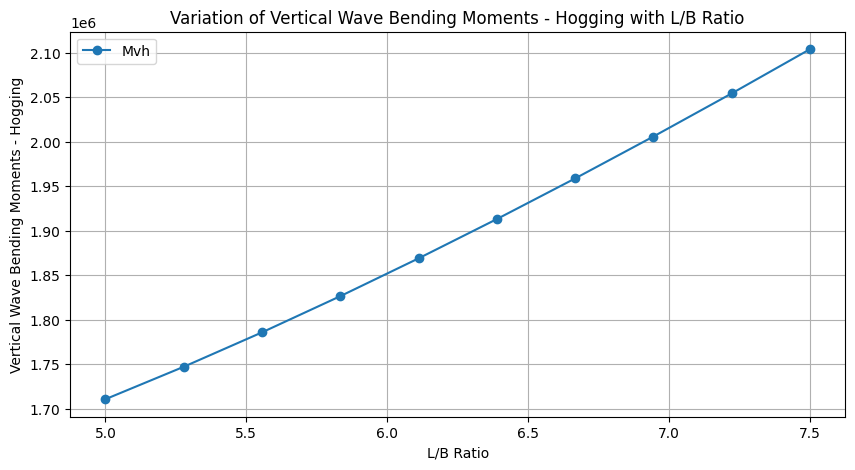

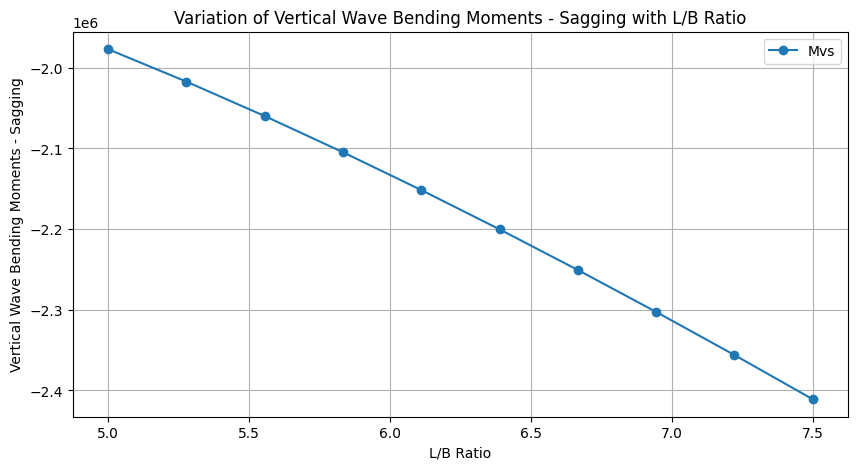

In [71]:
# -----------------------------------------
# Prediction
# Variation of Moments with L/B Ratio
# Assume VOL DISP = 100000
# Assign DRAFT , T = 20
# -----------------------------------------

# Generating Input Data for Prediction
VDISP0 = 100000
T0 = 20
Cb0 = 0.75
LbyB = np.linspace(5,7.5,10,endpoint=True)
nS = len(LbyB)
LB = np.ones(nS)*VDISP0/(T0*Cb0)
B = np.sqrt(LB/LbyB)
L = LbyB * B
Cb = np.ones(nS)*Cb0

x = np.array([L,B,Cb])
a[0] = (x - c_mean[0:3][:,None] )/c_stdv[0:3][:,None]

# Forward Pass for Prediction
# Hidden Layers
for i in range(1,nL):
    z[i]= W[i]@a[i-1] + b[i][:,None]
    a[i]=af_sigmoid(z[i])
    pass

# Layer nL i.e, Output Layer
i=nL
z[i]= W[i]@a[i-1] + b[i][:,None]
a[i]=z[i]

Mvh=a[-1][0,:]*c_stdv[3]+ c_mean[3]
Mvs=a[-1][1,:]*c_stdv[4]+ c_mean[4]
# Printing Prediction Results
print(f"VDISP0 = {VDISP0} \nT0 = {T0} \nCb0 = {Cb0}")
print("Results for Prediction")
print("\t-----------------------------------------------------------------------------------------------")
print(f"{'L/B':>12s}\t{'L':>12s}\t{'B':>12s}\t{'Cb':>12s}\t{'Mv-h':>12s}\t{'Mv-s':>12s}")
print("\t-----------------------------------------------------------------------------------------------")
for i in range(len(L)):
    print(f"{LbyB[i]:12.2f}\t{x[0,i]:12.2f}\t{x[1,i]:12.2f}\t{x[2,i]:12.2f}\t{Mvh[i]:12.2f}\t{Mvs[i]:12.2f}")
print("\t-----------------------------------------------------------------------------------------------")

plt.figure(figsize=(10,5))
plt.plot(LbyB,Mvh,'o-',label='Mvh')
plt.grid()
plt.xlabel('L/B Ratio')
plt.ylabel('Vertical Wave Bending Moments - Hogging')
plt.title('Variation of Vertical Wave Bending Moments - Hogging with L/B Ratio')
plt.legend(loc='best')

plt.figure(figsize=(10,5))
plt.plot(LbyB,Mvs,'o-',label='Mvs')
plt.grid()
plt.xlabel('L/B Ratio')
plt.ylabel('Vertical Wave Bending Moments - Sagging')
plt.title('Variation of Vertical Wave Bending Moments - Sagging with L/B Ratio')
plt.legend(loc='best')
plt.show()